# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

children  days_employed  dob_years            education  education_id  \
0          1   -8437.673028         42               высшее             0   
1          1   -4024.803754         36              среднее             1   
2          0   -5623.422610         33              Среднее             1   
3          3   -4124.747207         32              среднее             1   
4          0  340266.072047         53              среднее             1   
5          0    -926.185831         27               высшее             0   
6          0   -2879.202052         43               высшее             0   
7          0    -152.779569         50              СРЕДНЕЕ             1   
8          2   -6929.865299         35               ВЫСШЕЕ             0   
9          0   -2188.756445         41              среднее             1   
10         2   -4171.483647         36               высшее             0   
11         0    -792.701887         40              среднее             1   
12         0            NaN         65              среднее             1   
13         0   -1846.641941         54  неоконченное высшее             2   
14         0   -1844.956182         56               высшее             0   
15         1    -972.364419         26              среднее             1   
16         0   -1719.934226         35              среднее             1   
17         0   -2369.999720         33               высшее             0   
18         0  400281.136913         53              среднее             1   
19         0  -10038.818549         48              СРЕДНЕЕ             1   

       family_status  family_status_id gender income_type  debt  \
0    женат / замужем                 0      F   сотрудник     0   
1    женат / замужем                 0      F   сотрудник     0   
2    женат / замужем                 0      M   сотрудник     0   
3    женат / замужем                 0      M   сотрудник     0   
4   гражданский брак                 1      F   пенсионер     0   
5   гражданский брак                 1      M   компаньон     0   
6    женат / замужем                 0      F   компаньон     0   
7    женат / замужем                 0      M   сотрудник     0   
8   гражданский брак                 1      F   сотрудник     0   
9    женат / замужем                 0      M   сотрудник     0   
10   женат / замужем                 0      M   компаньон     0   
11   женат / замужем                 0      F   сотрудник     0   
12  гражданский брак                 1      M   пенсионер     0   
13   женат / замужем                 0      F   сотрудник     0   
14  гражданский брак                 1      F   компаньон     1   
15   женат / замужем                 0      F   сотрудник     0   
16   женат / замужем                 0      F   сотрудник     0   
17  гражданский брак                 1      M   сотрудник     0   
18    вдовец / вдова                 2      F   пенсионер     0   
19         в разводе                 3      F   сотрудник     0   

     total_income                                 purpose  
0   253875.639453                           покупка жилья  
1   112080.014102                 приобретение автомобиля  
2   145885.952297                           покупка жилья  
3   267628.550329              дополнительное образование  
4   158616.077870                         сыграть свадьбу  
5   255763.565419                           покупка жилья  
6   240525.971920                       операции с жильем  
7   135823.934197                             образование  
8    95856.832424                   на проведение свадьбы  
9   144425.938277                 покупка жилья для семьи  
10  113943.491460                    покупка недвижимости  
11   77069.234271       покупка коммерческой недвижимости  
12            NaN                         сыграть свадьбу  
13  130458.228857                 приобретение автомобиля  
14  165127.911772              покупка жилой недвижимости  
15  116820.904450 

**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [14]:
data.duplicated().sum()

54

In [15]:
data = data.drop_duplicates()

**Задание 15. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [16]:
data['education'] = data['education'].str.lower()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуйте данные и ответьте на вопросы

**Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

In [22]:
data.shape

(21348, 14)

Приведём показатель в бинарный вид, для того, чтобы посмотреть есть ли разница между теми, у кого есть дети и теми, у кого детей нет и визуализируем результат:

In [23]:
def children_binary(child_num):
    if child_num == 0:
        return 0
    else:
        return 1
    
data['has_children'] = data['children'].apply(children_binary)
children_debt = data.groupby('has_children')['debt'].mean()
children_debt*100

has_children
0    7.535266
1    9.239055
Name: debt, dtype: float64

In [24]:
debt_mean = data['debt'].mean()
for category in data['has_children'].unique():
    relation = data.loc[data['has_children'] == category]['debt'].mean() / debt_mean
    print(f'У людей в категории "{category}"" отношение среднего группы к общему = {relation}')

У людей в категории "1"" отношение среднего группы к общему = 1.138772253076448
У людей в категории "0"" отношение среднего группы к общему = 0.928769413445342


<AxesSubplot:xlabel='has_children', ylabel='debt'>

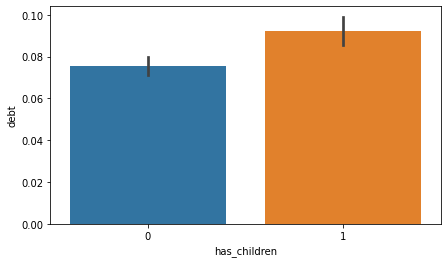

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
sns.barplot(data=data, y='debt', x='has_children')

Видим, что **в среднем, люди имеющие детей незначительно чаще других имели задолженности по возврату кредитов**, однако учитывая относительно небольшое различие можем предположить, что это отклонение может быть вызвано какими-то другими факторами, более актуальными для тех, у кого есть дети или просто ошибкой выборки.

Давайте посмотрим **различия по количеству детей:**

<AxesSubplot:xlabel='children', ylabel='debt'>

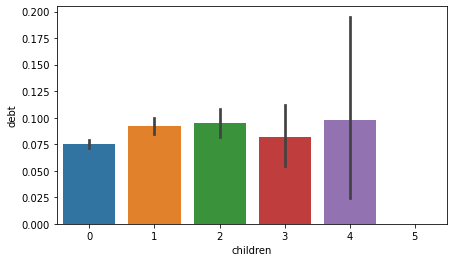

In [26]:
plt.figure(figsize=(7, 4))
sns.barplot(data=data, y='debt', x='children')

In [27]:
children_debt_num = data.groupby('children')['debt'].mean()
children_debt_num * 100

children
0    7.535266
1    9.232689
2    9.454191
3    8.181818
4    9.756098
5    0.000000
Name: debt, dtype: float64

В целом - данные совпадают с предыдущей гипотезой. Однако, есть интересный кейс с людьми, имеющими четырёх детей - наличие определённого количества статистических выбросов у тех, кто имеет 4 детей.

Text(0.5, 1.0, 'Наличие задолженности в группах по кол-ву детей')

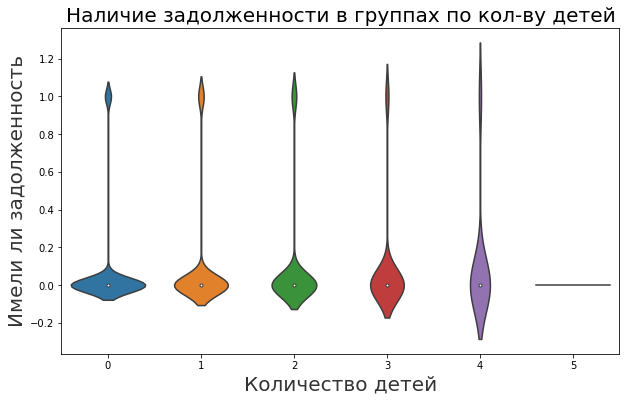

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.violinplot(x="children", y="debt",  data=data)
ax.set_xlabel("Количество детей",size = 20,alpha=0.8)
ax.set_ylabel("Имели ли задолженность",size = 20,alpha=0.8)
ax.set_title("Наличие задолженности в группах по кол-ву детей",size=20)

Давайте посмотрим, **сколько всего людей попало в каждую группу:**

In [29]:
for num in data['children'].unique():
    sample_size = data[data['children'] == num]['children'].count()
    print(f'Число наблюдений с числом детей равным {num}: {sample_size}')

Число наблюдений с числом детей равным 1: 4809
Число наблюдений с числом детей равным 0: 14107
Число наблюдений с числом детей равным 3: 330
Число наблюдений с числом детей равным 2: 2052
Число наблюдений с числом детей равным 4: 41
Число наблюдений с числом детей равным 5: 9


Из этого делаем вывод, что число людей в выборке с 4 и 5 детьми крайне мало, а значит мы не можем делать статистически значимые выводы на основании этих групп

In [30]:
for category in data['children'].unique():
    relation = data.loc[data['children'] == category]['debt'].mean() / debt_mean
    print(f'У людей с количеством детей = "{category}"" отношение среднего группы к общему = {relation}')

У людей с количеством детей = "1"" отношение среднего группы к общему = 1.1379875205122034
У людей с количеством детей = "0"" отношение среднего группы к общему = 0.928769413445342
У людей с количеством детей = "3"" отношение среднего группы к общему = 1.0084610539575898
У людей с количеством детей = "2"" отношение среднего группы к общему = 1.16528908877274
У людей с количеством детей = "4"" отношение среднего группы к общему = 1.2025009857488875
У людей с количеством детей = "5"" отношение среднего группы к общему = 0.0


**Вывод: в среднем, люди имеющие детей незначительно чаще других имели задолженности по возврату кредитов**, однако учитывая относительно небольшое различие можем предположить, что это отклонение может быть вызвано какими-то другими факторами, более актуальными для тех, у кого есть дети или просто ошибкой выборки.

Гипотеза о влиянии ***числа*** детей также не подтвердилась - есть определённые выбросы среди людей, имеющих 4 детей, однако ввиду недостаточного количества наблюдений мы не можем делать статистически значимые выводы

**Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

Процедура в значительной степени будет аналогична предыдущей.

Для начала давайте посмотрим, сколько наблюдений у нас есть в различных группах чтобы понять, можем ли мы делать какие-либо значимые выводы:

In [31]:
for num in data['family_status'].unique():
    sample_size = data[data['family_status'] == num]['family_status'].count()
    print(f'Число наблюдений с семейным положением = {num}: {sample_size}')

Число наблюдений с семейным положением = женат / замужем: 12266
Число наблюдений с семейным положением = гражданский брак: 4146
Число наблюдений с семейным положением = вдовец / вдова: 951
Число наблюдений с семейным положением = в разводе: 1189
Число наблюдений с семейным положением = Не женат / не замужем: 2796


В целом, **число наблюдений скорее достаточное**, а значит выводы мы делать можем. Перейдём к непосредственному анализу показателей:

family_status
Не женат / не замужем    9.763948
в разводе                7.064760
вдовец / вдова           6.624606
гражданский брак         9.286059
женат / замужем          7.557476
Name: debt, dtype: float64


Text(0.5, 1.0, 'Наличие задолженности в группах семейному положению')

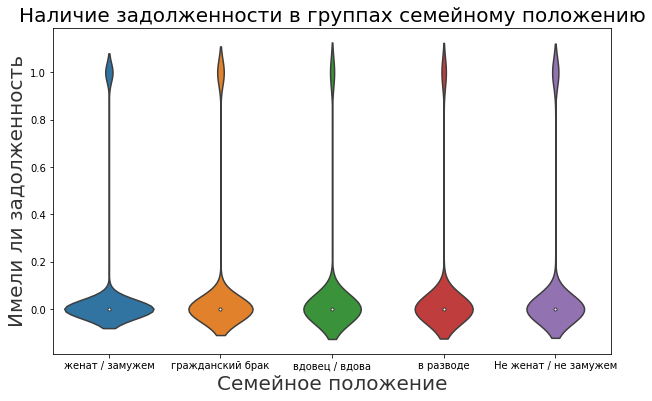

In [32]:
print(data.groupby('family_status')['debt'].mean() *100)

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.violinplot(x="family_status", y="debt",  data=data)
ax.set_xlabel("Семейное положение",size = 20,alpha=0.8)
ax.set_ylabel("Имели ли задолженность",size = 20,alpha=0.8)
ax.set_title("Наличие задолженности в группах семейному положению",size=20)

Пока что мы видим две группы с несколько большим числом задолженностей - не женатые и живущие в гражданском браке. Давайте объединим их в одну группу и посмотрим общую разницу:

In [33]:
def fam_stat_binary(row):
    if "не женат" in row or "гражданский брак" in row:
        return "группа риска"
    else:
        return "прочие"
    
data['fam_stat_risk'] = data['family_status'].apply(fam_stat_binary)
data_family_risk = data.groupby('fam_stat_risk')['debt'].mean()
data_family_risk * 100

fam_stat_risk
группа риска    9.286059
прочие          7.830485
Name: debt, dtype: float64

<AxesSubplot:xlabel='fam_stat_risk', ylabel='debt'>

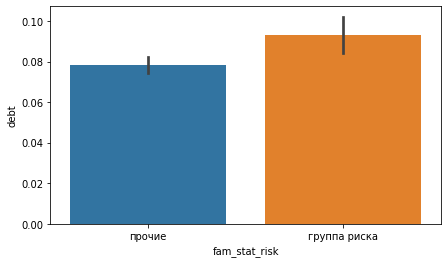

In [34]:
plt.figure(figsize=(7, 4))
sns.barplot(data=data, y='debt', x='fam_stat_risk')

In [35]:
for category in data['family_status'].unique():
    relation = data.loc[data['family_status'] == category]['debt'].mean() / debt_mean
    print(f'У представителей категории "{category}"" отношение среднего группы к общему = {relation}')

У представителей категории "женат / замужем"" отношение среднего группы к общему = 0.9315069086368409
У представителей категории "гражданский брак"" отношение среднего группы к общему = 1.144565729621695
У представителей категории "вдовец / вдова"" отношение среднего группы к общему = 0.8165247229730221
У представителей категории "в разводе"" отношение среднего группы к общему = 0.8707765758871253
У представителей категории "Не женат / не замужем"" отношение среднего группы к общему = 1.203468663580767


**Вывод:** Присутствует незначительная разница между людьми с разным семейным положением - в условную "группу риска" (группу людей, имеющих задолженности) можно отнести неженатых, а также живущих в гражданском браке.

При этом появляется **гипотеза о том, что ключевое влияние может оказывать не само семейное положение, а другой фактор - уровень дохода (который может быть ниже у ещё неженатых (более молодые), а также живущих в гражданском браке.**

Влияние дохода мы проверим следующим шагом, однако давайте посмотрим на наличие потенциальной связи между этими двумя показателями:

In [36]:
data_family_income_meadian = data.groupby('family_status')['total_income'].median()
data_family_income_mean = data.groupby('family_status')['total_income'].mean()
for num in data['family_status'].unique():
    print(f'Для людей с семейным положением = {num}: значение медианного дохода составляет {data_family_income_meadian[num]}, среднего - {data_family_income_mean[num]}')

Для людей с семейным положением = женат / замужем: значение медианного дохода составляет 142902.5, среднего - 166743.3466492744
Для людей с семейным положением = гражданский брак: значение медианного дохода составляет 142594.0, среднего - 164734.59044862518
Для людей с семейным положением = вдовец / вдова: значение медианного дохода составляет 127310.0, среднего - 142559.78969505784
Для людей с семейным положением = в разводе: значение медианного дохода составляет 143503.0, среднего - 167955.22708158116
Для людей с семейным положением = Не женат / не замужем: значение медианного дохода составляет 142594.0, среднего - 166552.38447782546


Видим, что **особой разницы между этими показателями нет** - несколько меньше доход у вдов и вдовцов, однако  они в то же время демонстрируют самую низкую долю задолженностей

**Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

Снова проводим аналогичную процедуру:

Для начала вспомним заданные ранее диапазоны дохода:
- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [37]:
for num in data['total_income_category'].unique():
    sample_size = data[data['total_income_category'] == num]['total_income_category'].count()
    print(f'Число наблюдений с уровнем дохода = {num}: {sample_size}')

Число наблюдений с уровнем дохода = B: 5014
Число наблюдений с уровнем дохода = C: 15938
Число наблюдений с уровнем дохода = D: 349
Число наблюдений с уровнем дохода = E: 22
Число наблюдений с уровнем дохода = A: 25


Видим, что **наблюдений с низким доходом (0-30000) и высоким (1000001 и выше) очень мало**, а значит мы не можем сделать по этим группам статистически значимых выводов.

**С группой "D" (30001- 50000) также стоит быть осторожным** - их не так мало (349), однако потенциальная ошибка выборки при анализе этой группы будет достаточно велика

total_income_category
D    6.017192
B    7.060231
A    8.000000
C    8.489145
E    9.090909
Name: debt, dtype: float64


<AxesSubplot:xlabel='total_income_category', ylabel='debt'>

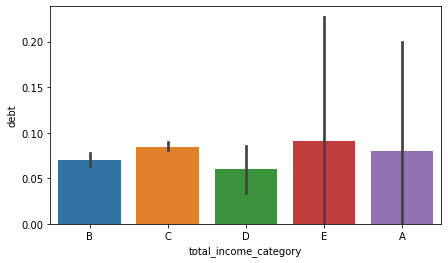

In [38]:
print(data.groupby('total_income_category')['debt'].mean().sort_values() *100)

plt.figure(figsize=(7, 4))
sns.barplot(data=data, y='debt', x='total_income_category')

Давайте посмотрим, как средее число невыплаченных долгов каждой группы относится к среднему по всей базе:

In [39]:
for category in data['total_income_category'].unique():
    relation = data.loc[data['total_income_category'] == category]['debt'].mean() / debt_mean
    print(f'У представителей категории {category} отношение среднего группы к общему = {relation}')

У представителей категории B отношение среднего группы к общему = 0.8702183539668604
У представителей категории C отношение среднего группы к общему = 1.0463410902002765
У представителей категории D отношение среднего группы к общему = 0.7416571265972722
У представителей категории E отношение среднего группы к общему = 1.1205122821750997
У представителей категории A отношение среднего группы к общему = 0.9860508083140878


**Вывод:** Сравнивая категории B и C можем сделать вывод о том, что **у людей с бОльшим доходом (категория B) несколько меньше задолженностей по кредитам (категория B) - примерно на 13% ниже, чем в среднем** по нашей базе данных, а **у людей с доходом ниже (категория С) их несколько больше, чем в среднем (на 4.6%)**

**Показатель категории D (30001 - 50000) ещё ниже (на 26%)**, в нашей выборке люди с этим доходом имеют меньше всего задолженностей, однако мы не можем отрицать и гипотезу, нуждающуюся в дальнейшей проверке - что люди этой категории (относительно небольшой доход) зачастую ещё не брали кредитов. Также **стоит учитывать сравнительно небольшой объём выборки - на больших данных можно было бы сделать чуть более валидный вывод.**

Как обозначалось ранее, **по категориям "Е" и "А" мы не можем делать статистически значимых выводов - слишком малый объём выборки**

**Задание 22. Как разные цели кредита влияют на его возврат в срок?**

Продолжим аналогичную процедуру. Для начала вспомним - на какие категории мы разбили цели:
- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [40]:
for num in data['purpose_category'].unique():
    sample_size = data[data['purpose_category'] == num]['purpose_category'].count()
    print(f'Число наблюдений с целью кредита = {num}: {sample_size}')

Число наблюдений с целью кредита = операции с недвижимостью: 10754
Число наблюдений с целью кредита = операции с автомобилем: 4281
Число наблюдений с целью кредита = получение образования: 3989
Число наблюдений с целью кредита = проведение свадьбы: 2324


Видим достаточно большое количество наблюдений по каждой категории - а значит, можем делать по ним статистически значимые выводы. Перейдём к непосредственному анализу:

purpose_category
операции с недвижимостью    7.253115
проведение свадьбы          7.874355
получение образования       9.250439
операции с автомобилем      9.343611
Name: debt, dtype: float64


<AxesSubplot:xlabel='purpose_category', ylabel='debt'>

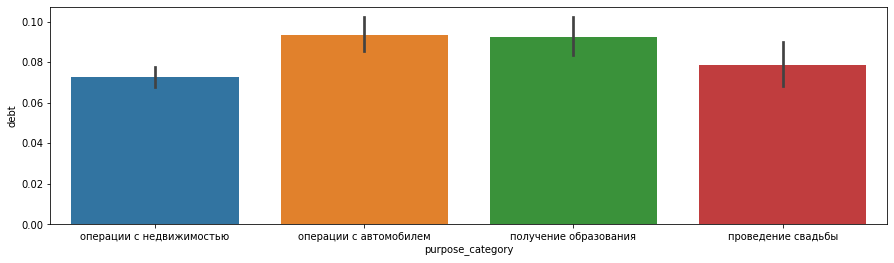

In [41]:
print(data.groupby('purpose_category')['debt'].mean().sort_values() *100)

plt.figure(figsize=(15, 4))
sns.barplot(data=data, y='debt', x='purpose_category')

На полученных данных видим **две зоны риска - операции с автомобилем и получение образование, люди, имеющие такую цель получения кредитов как правило имеют и больше задолженностей.** 

Давайте посмотрим насколько они отклоняются от среднего показателя по всей базе данных:

In [42]:
for category in data['purpose_category'].unique():
    relation = data.loc[data['purpose_category'] == category]['debt'].mean() / debt_mean
    print(f'У представителей категории "{category}"" отношение среднего группы к общему = {relation}')

У представителей категории "операции с недвижимостью"" отношение среднего группы к общему = 0.8939925033533899
У представителей категории "операции с автомобилем"" отношение среднего группы к общему = 1.151659435078355
У представителей категории "получение образования"" отношение среднего группы к общему = 1.1401753204684708
У представителей категории "проведение свадьбы"" отношение среднего группы к общему = 0.9705642099907381


**Вывод:** анализ показал наличие влияние цели кредита на его возврат в срок:

**Люди, бравшие кредит на операции с автомобилем на 15% чаще среднего задерживали выплаты по своему кредиту. Люди, бравшие кредит на получение образование - на 14%.**

При этом **самым надёжным направлением кредитования являются операции с недвижимостью** - представители этой категории на 11% реже среднего задерживали свои выплаты.

**Кредиты на проведение свадьбы** демонстрируют показатели, приближенные к средним (на 3% ниже).

**Задание 23. Приведите возможные причины появления пропусков в исходных данных.**

*Ответ:* Есть две основные причины пропусков:

- **Случайные пропуски** (не связанные с каким-то параметром - а именно случайные пропуски).
- **Неслучайные** (связанные с определёнными показателями):
    - Например, если я пошёл к врачу с сердечными проблемами и имею излишний вес, то шанс того, что меня заставят померять мой вес выше, чем если я выгляжу стандартно, а это значит, что у людей с обычным весом будет больше доля пропусков. 
    - Точно так же люди с высоким доходом чаще скрывают свой доход при различных операциях
    
**Если говорить о причинах их появления** - то она зачастую зависит от каких-то причин, иногда связанных с переменной (не хочу получать рассылку - не оставил свой имейл, не хочу раскрывать доход - не указал его), иногда - с оператором (человеческая ошибка того, кто заполнял базу данных - просто забыл проставить (или машинная ошибка - какой-нибудь условный integer overflow).

**Если же говорить конкретно про наши данные** - то наши пропуски были в столбцах "days employed". Возможно, это связано с тем, что кто-то не хотел указывать число своих проработанных дней (для того, чтобы скрыть их малое число и нестабильную рабочую историю) или же просто забыл их указать (либо сам, либо клерк, переносящий анкету в базу данных). Второе очень даже вероятно - может, человек просто не помнил дату своего трудоустройства и оставил поле пустым.

**Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

*Ответ:* Не всегда это является лучшим решением, нужно смотреть на данные и их природу - смотря что изучаем)

Но как правило медиана даёт наилучшее представление о природе данных в целом, в виду того, что среднее значение более подвержено влиянию на него выбросов (1000 человек получает по 1 000 рублей, один человек получает 1 миллиард - в среднем все миллионеры). А за счёт медианы мы поймаем число "по центру", а значит в окружении наиболее распространённых значений.

Иногда можно использовать и среднее и моду и более сложные аналитические инструменты - но это уже зависит от природы данных и задач :)

## Общий вывод.

Напишите ваш общий вывод.

- Проведённый анализ на основании данных показал наличие **наиболее статистически значимого фактора, влияющего на риск невыплаты кредита - причина, на которую берётся этот кредит.** 
    - **Кредиты на операции с автомобилем имеют долю наличия задержек на 15% выше среднего**, на **получение образования - на 14%.**
    - В то же время **операции с недвижимостью являются наиболее безопасным направлением** - у этой категории **доля задержек с выплатами на 11% ниже среднего показателя.**


- **Люди с доходом 200.000 - 1.000.000 рублей в месяц на 13% реже среднего задерживают выплаты по кредитам**, что может говорить о положительной корреляции уровня дохода и безопасности кредитования. В то же время этот вывод требует дальнейшей проверки ввиду небольшой выборки людей с очень высоким доходом. 
    - **Положительный результат также показала группа людей с доходом от 30 до 50 тыс. рублей (на 26% меньше невыплат)**, однако ввиду небольшого количества наблюдений этот вывод также нуждается в дальнейшей проверке.


- **Среди людей, имеющих детей доля задолженностей на 13% выше среднего,** однако более детальный анализ показывает лишь незначительные различия между людьми с разным количеством детей.
    
    
- Анализ влияния семейного положения показал существование определённой **группы риска - людей, находящихся в гражданском браке (доля задолженностей на 14% выше среднего)**, а также **людей, которые не женаты/не замужем (на 20% выше среднего).** 
    - В то же время **самой "безопасной" группой являются вдовы и вдовцы (доля задолженностей на 19% ниже среднего показателя по базе)**

